In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.physics.mechanics import msubs

import seaborn as sns
import pandas as pd
from scipy import stats

import IPython.display as ipd
from IPython.display import display, Math

from typing import Dict, Any

# Problem Set 1.1

Solve the ODE by integration or by remembering a differentiation formula.

1. $y' + 2 \sin 2\pi x = 0$
3. $y' = y$
5. $y' = 4e^{-x} \cos x$
7. $y' = \cosh 5.13x$
   

In [2]:
def show_ode_solution(problem_num: str, ode: sp.Eq, **kwargs) -> sp.Expr:
    """Display the ODE and its solution with proper formatting.

    Args:
        problem_num: Problem number
        ode: The ODE to solve
        **kwargs: Additional keyword arguments to pass to dsolve
    """
    solution = sp.dsolve(ode, **kwargs)
    display(
        Math(
            rf"\text{{Problem {problem_num}:}} \\"
            rf"\quad \text{{Equation: }} {sp.latex(ode)} \\"
            rf"\quad\text{{Solution: }} \boxed{{{sp.latex(solution)}}}"
        )
    )
    return solution


# Define common symbols
x = sp.Symbol("x")
y = sp.Function("y")(x)

# Dictionary of ODEs to solve
odes = {
    "1": sp.Eq(y.diff(x) + 2 * sp.sin(2 * sp.pi * x), 0),
    "3": sp.Eq(y.diff(x) - y, 0),
    "5": sp.Eq(y.diff(x) - 4 * sp.exp(-x) * sp.cos(x), 0),
}

# Special case for problem 7
a = sp.Rational("5.13").limit_denominator(1000)
odes["7"] = sp.Eq(y.diff(x) - sp.cosh(a * x), 0)

# Solve and display all ODEs
solutions = {num: show_ode_solution(num, ode) for num, ode in odes.items()}

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## IVP or ICS

a. Verify that $y$ is a solution of the ODE.  
b. Determine from $y$ the particular solution of the IVP.  
c. Graph the solution of the IVP.

9. $y' + 4y = 1.4, \quad y = ce^{-4x} + 0.35, \quad y(0) = 2$
11. $y' = y + e^x, \quad y = (x + c)e^x, \quad y(0) = \frac{1}{2}$
13. $y' = y - y^2, \quad y = \frac{1}{1 + ce^{-x}}, \quad y(0) = 0.25$

15. Find two constant solutions of the ODE in Prob. 13 by inspection.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

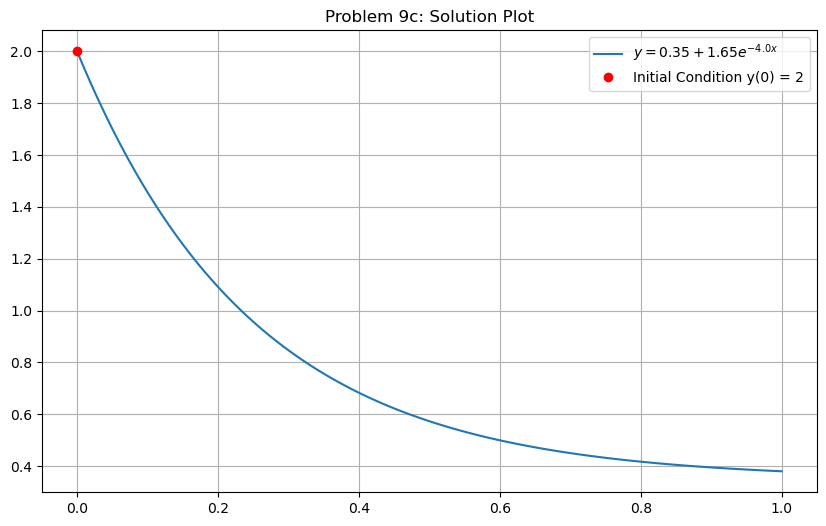

<IPython.core.display.Math object>

<IPython.core.display.Math object>

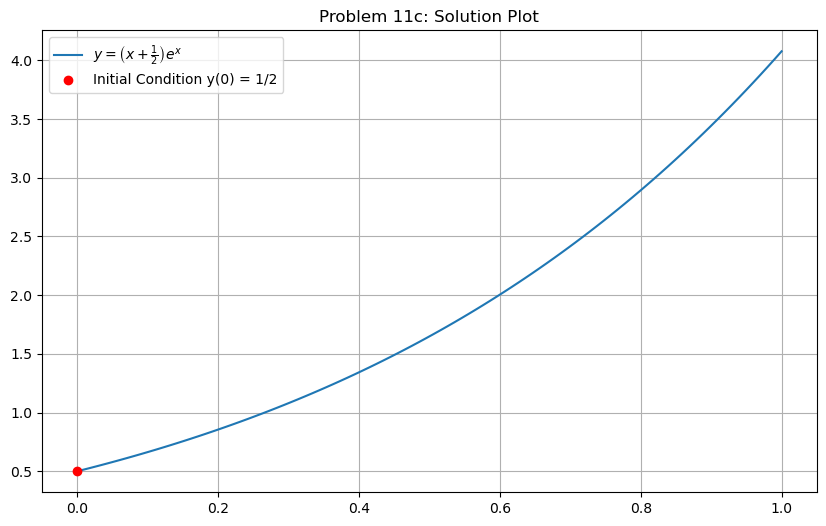

<IPython.core.display.Math object>

<IPython.core.display.Math object>

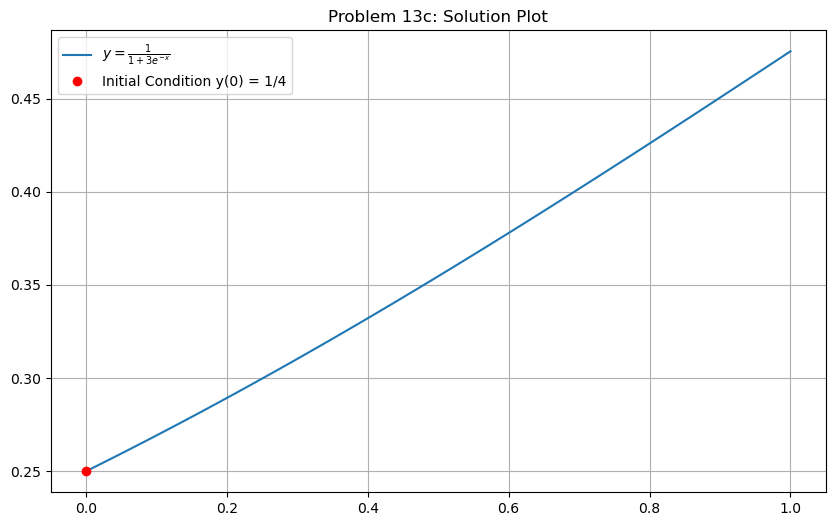

Eq(y(x), 1/(C1*exp(-x) + 1))

In [ ]:
x, c = sp.symbols("x c", real=True)
y = sp.Function("y")(x)


def solve_ode(ode, y, x, ics=None):
    """Solve the ODE with optional initial conditions."""
    return sp.dsolve(ode, y, ics=ics)


def verify_solution(ode, y_soln, x):
    """Verify if y_soln satisfies the ODE."""
    substituted = ode.subs(y, y_soln)
    lhs = substituted.lhs.doit()
    return lhs == ode.rhs, lhs


def plot_solution(problem_num, y_solution, x_range=None, ics=None):
    """Plot the solution with optional initial condition."""
    if x_range is None:
        x_range = [0, 1]

    x_vals = np.linspace(x_range[0], x_range[1], 100)

    # Convert SymPy expression to a callable function
    f = sp.lambdify(x, y_solution, "numpy")
    y_vals = f(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label=f"$y = {sp.latex(y_solution)}$")

    if ics:
        plt.plot(
            ics[0], ics[1], "ro", label=f"Initial Condition y({ics[0]}) = {ics[1]}"
        )

    plt.title(f"Problem {problem_num}c: Solution Plot")
    plt.legend()
    plt.grid(True)
    plt.show()


def display_solution(problem_num, ode, y_soln, ics):
    """Display the solution process and results."""
    # Part a: Verify the solution
    is_solution, lhs = verify_solution(ode, y_soln, x)
    display(
        Math(
            rf"\text{{Problem {problem_num}a:}} \\"
            rf"\quad\text{{Verification: }} {sp.latex(ode.lhs)} = {sp.latex(lhs)}"
        )
    )

    # Part b: Solve with initial conditions
    ics_eval = {y.subs(x, ics[0]): ics[1]}
    solution = solve_ode(ode, y, x, ics=ics_eval)
    display(
        Math(
            rf"\text{{Problem {problem_num}b:}} \\"
            rf"\quad\text{{Solution: }} \boxed{{{sp.latex(solution)}}}"
        )
    )

    # Part c: Plot the solution
    plot_solution(problem_num, solution.rhs, ics=ics)
    return solution


# Define symbols and ODE
ode = sp.Eq(sp.diff(y, x) + 4 * y, 1.4)

# Define general solution and initial condition
y_general = c * sp.exp(-4 * x) + 0.35
ics = (0, 2)

# Define the problems dictionary
problems = {
    "9": (sp.Eq(sp.diff(y, x) + 4 * y, 1.4), c * sp.exp(-4 * x) + 0.35, (0, 2)),
    "11": (
        sp.Eq(sp.diff(y, x), y + sp.exp(x)),
        c * (x + c) * sp.exp(x),
        (0, sp.Rational(1, 2)),
    ),
    "13": (
        sp.Eq(sp.diff(y, x),y - y**2 ),
        1/(1 +c*sp.exp(-x)),
        (0, sp.Rational(1, 4)),
    ),
}
# Now solve all problems
solutions = {
    num: display_solution(num, *problem_data)
    for num, problem_data in problems.items()  
}